Assignment: predicting house prices:

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

Investigate the data, and do any necessary data cleaning.

Explore the data and find some variables that you think would be useful in predicting house prices.

Build your initial model using these features and estimate the parameters using OLS.

In [1]:
# Import some packages:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect to the data base:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format( postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

In [3]:
# Look at the dataset:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# Look at the number of unique values in each column:
df.nunique()

id               1460
mssubclass         15
mszoning            5
lotfrontage       110
lotarea          1073
street              2
alley               2
lotshape            4
landcontour         4
utilities           2
lotconfig           5
landslope           3
neighborhood       25
condition1          9
condition2          8
bldgtype            5
housestyle          8
overallqual        10
overallcond         9
yearbuilt         112
yearremodadd       61
roofstyle           6
roofmatl            8
exterior1st        15
exterior2nd        16
masvnrtype          4
masvnrarea        327
exterqual           4
extercond           5
foundation          6
                 ... 
bedroomabvgr        8
kitchenabvgr        4
kitchenqual         4
totrmsabvgrd       12
functional          7
fireplaces          4
fireplacequ         5
garagetype          6
garageyrblt        97
garagefinish        3
garagecars          5
garagearea        441
garagequal          5
garagecond          5
paveddrive

In [5]:
# Look at the number of missing value in each column:
df.isnull().sum().sort_values(ascending=False)

poolqc           1453
miscfeature      1406
alley            1369
fence            1179
fireplacequ       690
lotfrontage       259
garagecond         81
garagetype         81
garageyrblt        81
garagefinish       81
garagequal         81
bsmtexposure       38
bsmtfintype2       38
bsmtfintype1       37
bsmtcond           37
bsmtqual           37
masvnrarea          8
masvnrtype          8
electrical          1
utilities           0
yearremodadd        0
mssubclass          0
foundation          0
extercond           0
exterqual           0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearbuilt           0
                 ... 
garagearea          0
paveddrive          0
wooddecksf          0
openporchsf         0
threessnporch       0
bsmtunfsf           0
screenporch         0
poolarea            0
miscval             0
mosold              0
yrsold              0
saletype            0
functional          0
totrmsabvgrd        0
kitchenqua

In [6]:
# Look at the type of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

As you know, in this dataset, saleprice is target variable and we want to predict the prices of the houses.

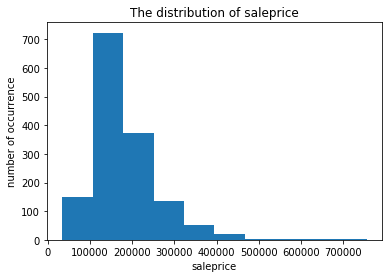

In [7]:
# Look at the distribution of target variable(saleprice):
plt.hist(df.saleprice)
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("number of occurrence")
plt.show()

as you can see here, the distribution of target variable is not normal and it is right skewed. Also, the majority of the observations have low saleprice values and few of the observations have high saleprice values. This makes the distribution of the target variable clustered at the left-most part of the histogram. 

In [8]:
# Calculate number of numeric columns:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


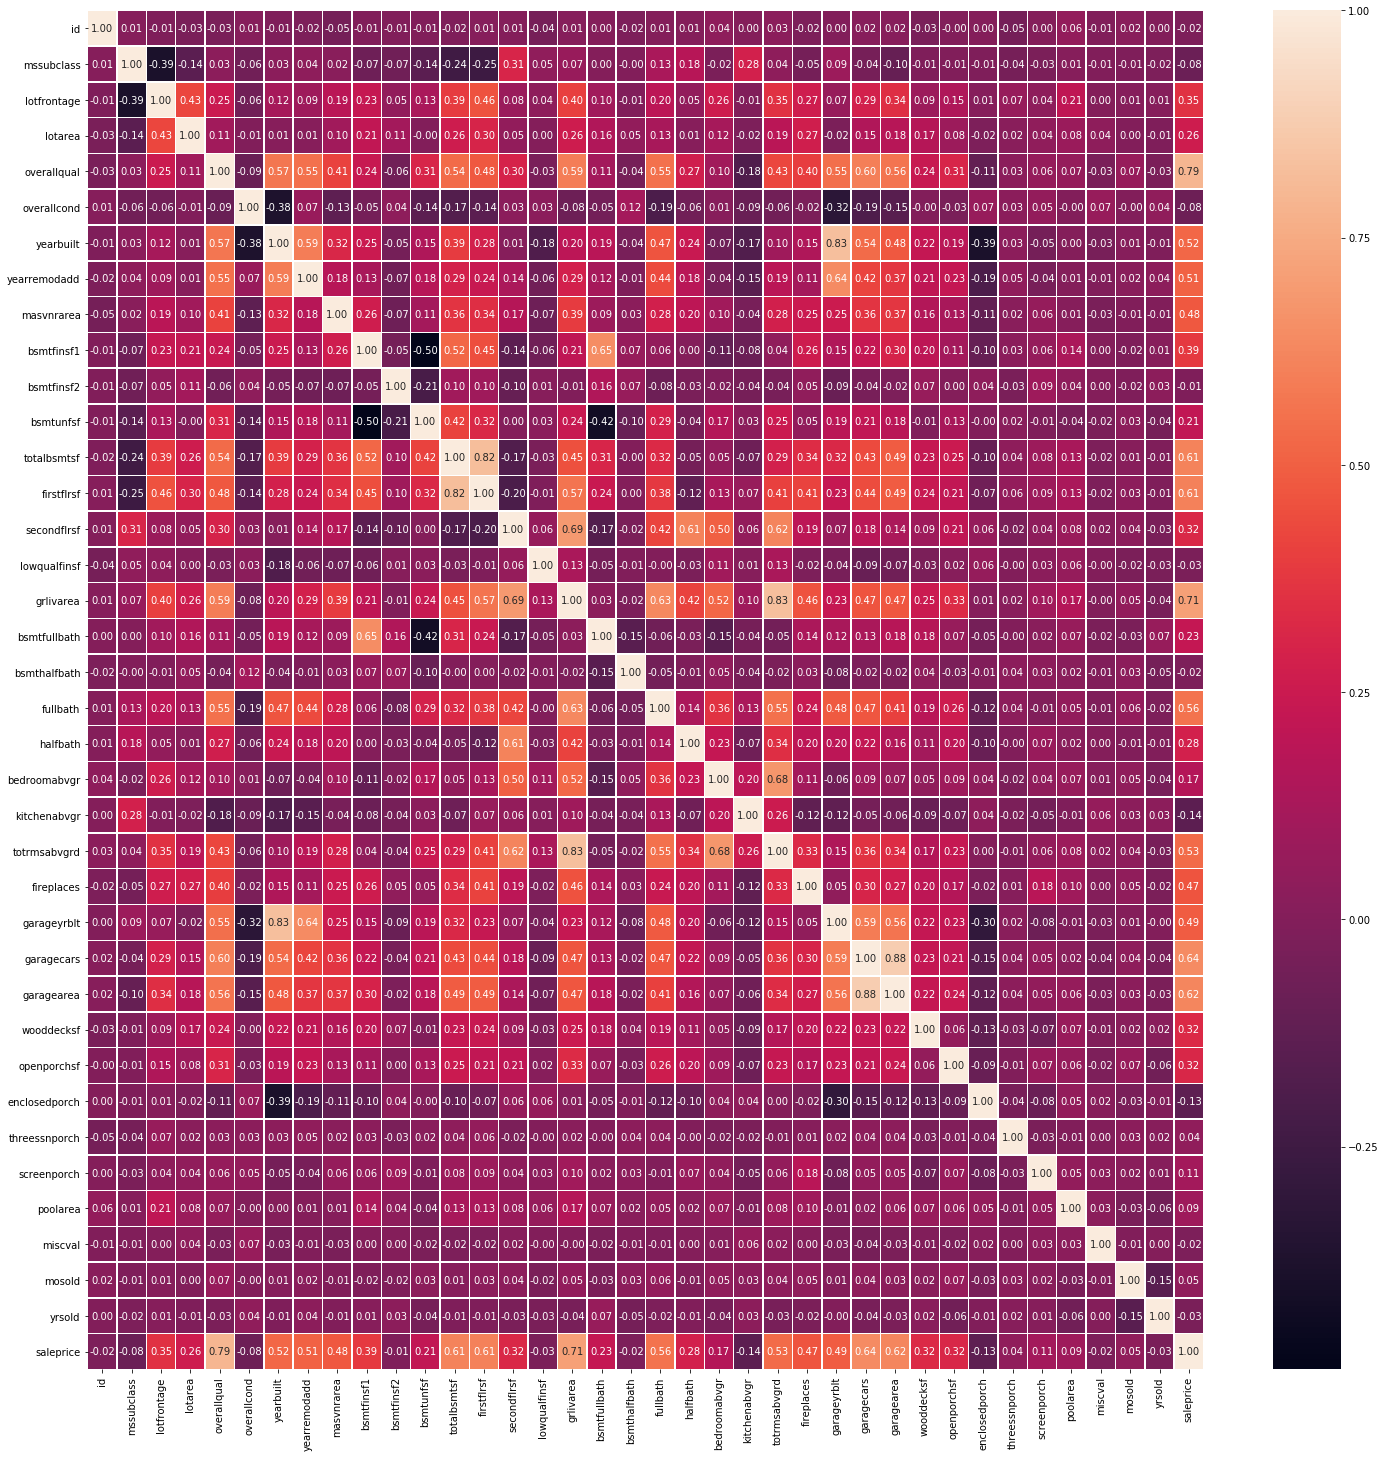

In [9]:
# Look at the correlationship between target variable and countinus columns:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

In [10]:
# Look at the correlation between target variable and numeric columns:
np.abs(df[numeric_columns].iloc[:,:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
id               0.021917
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: salepr

Now, look at the distribution between categorical columns and target variable.

In [11]:
# Calculate number of nonnumeric columns:
nonnumeric_columns=df.select_dtypes('object').columns
print(nonnumeric_columns)
print('number of nonnumeric columns is {}'.format(len(nonnumeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
number of nonnumeric columns is 43


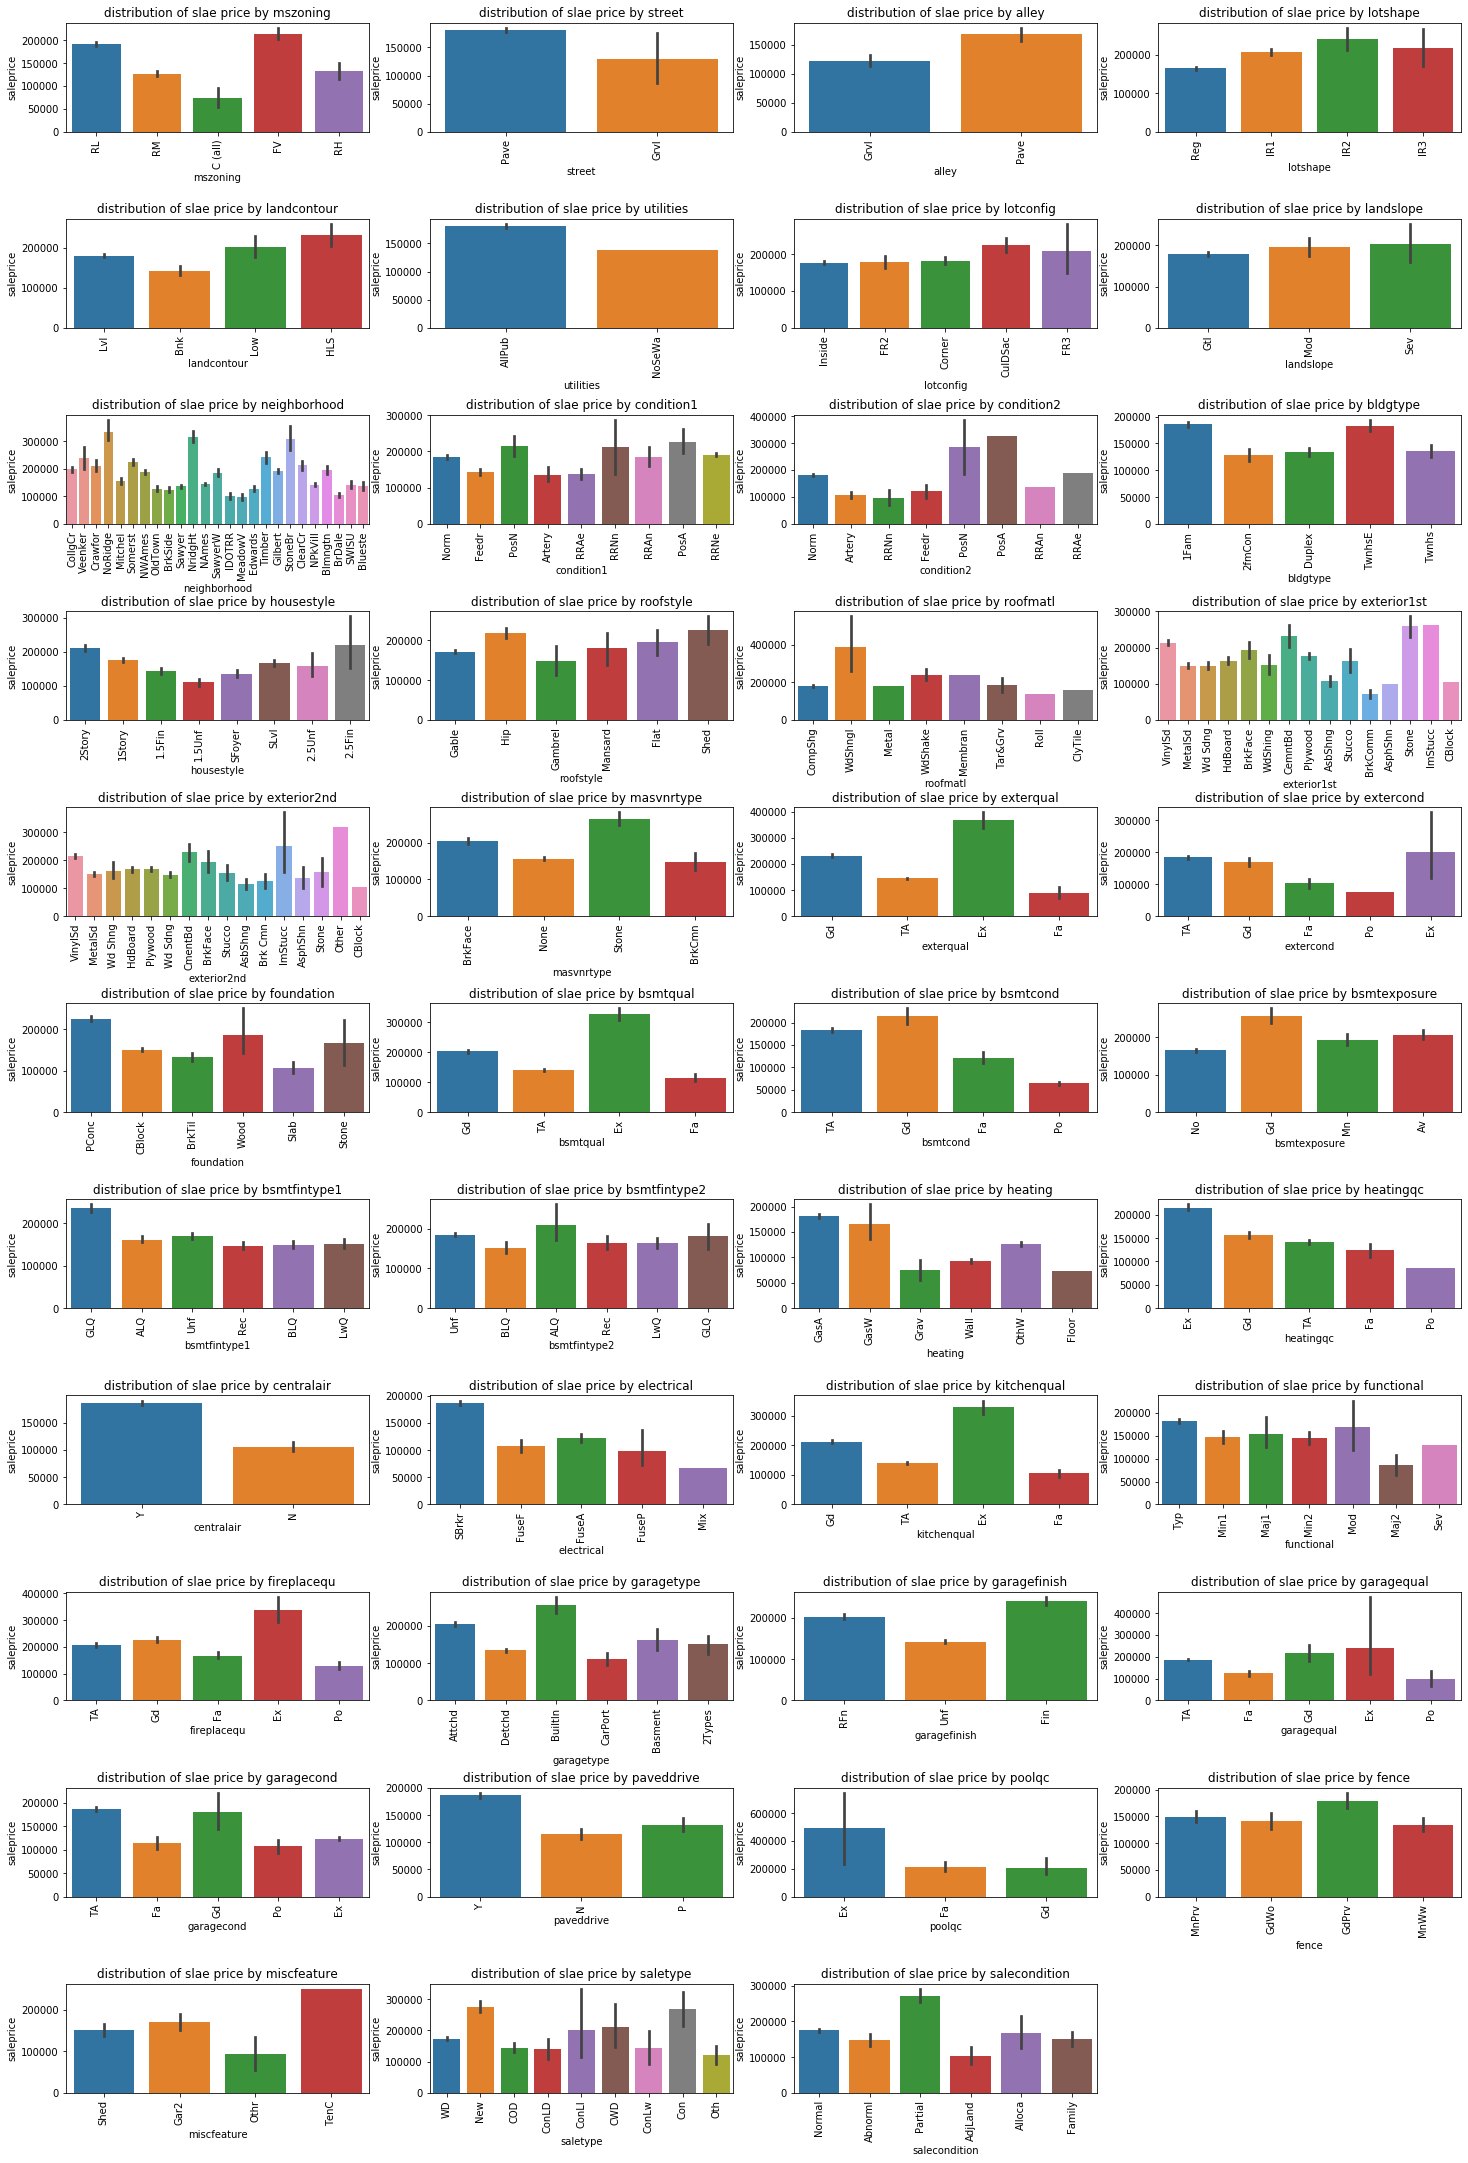

In [12]:
# Look at the distribution of target variable with nonnumeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.barplot(df[column], df['saleprice'])
    plt.title(f'distribution of slae price by {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

In [13]:
# Convert categorical columns to numeric by using dummies:
categorical = df.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
df = df.drop(categorical, axis=1)
df = pd.concat([df,dummies], axis=1)

In [14]:
# Look at the dataset:
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [15]:
# Look at the correlation between saleprice and all columns:
np.abs(df.iloc[:,:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice                1.000000
overallqual              0.790982
grlivarea                0.708624
garagecars               0.640409
garagearea               0.623431
totalbsmtsf              0.613581
firstflrsf               0.605852
exterqual_TA             0.589044
fullbath                 0.560664
totrmsabvgrd             0.533723
yearbuilt                0.522897
kitchenqual_TA           0.519298
yearremodadd             0.507101
foundation_PConc         0.497734
garageyrblt              0.486362
masvnrarea               0.477493
fireplaces               0.466929
exterqual_Gd             0.452466
bsmtqual_TA              0.452394
bsmtfintype1_GLQ         0.434597
garagefinish_Unf         0.410608
neighborhood_NridgHt     0.402149
bsmtfinsf1               0.386420
masvnrtype_None          0.374468
saletype_New             0.357509
garagetype_Detchd        0.354141
salecondition_Partial    0.352060
lotfrontage              0.351799
foundation_CBlock        0.343263
fireplacequ_Gd

Now modeling the saleprice houses with linear regression.I choose 5 high correlationship variables between target variable and continuse variables; also, I choose two high correlationship of categorical variables with target variable, then using all of them to model.  

saleprice:y = 𝛽0+𝛽1 overallqual + 𝛽2 grlivarea + 𝛽3 garagecars + 𝛽4 garagearea + 𝛽5 totalbsmtsf +𝛽6 exterqual_TA +𝛽7 kitchenqual_TA +𝜖

In [16]:
# Now we build a simple linear regression model and estimate it using OLS:

# Y is the target variable:
Y = df['saleprice']
# X is the feature set:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'exterqual_TA', 'kitchenqual_TA']]

# We create a LinearRegression model with statsmodels' sm linear_model module.

# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

# fit method estimates the coefficients using OLS
results = sm.OLS(Y,  X).fit()

# Inspect the results.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     686.7
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:11:06   Log-Likelihood:                -17477.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1452   BIC:                         3.501e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.278e+04   7313.170     -8.584      0.000   -7.71e+04   -4.84e+04
overallqual     2.001e+04   1199.489     16.680      0.000    1.77e+04    2.24e+04
grlivarea         45.4666      2.457     18.505      0.000      40.647      50.286
garagecars        1.3e+04   2992.143      4.344      0.000    7129.524    1.89e+04
garagearea        16.9487     10.323      1.642      0.101      -3.301      37.199
totalbsmtsf       31.0423      2.868     10.825      0.000      25.417      36.667
exterqual_TA   -9898.1910   3146.166     -3.146      0.002   -1.61e+04   -3726.675
kitchenqual_TA -9741.9446   2776.148     -3.509      0.000   -1.52e+04   -4296.256
==============================================================================
Omnibus:                      429.417   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43903.389
Skew:                          -0.225   Prob(JB):                         0.00
Kurtosis:                      29.861   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since we get the parameters  with statsmodels' sm by using OLS, we can write our estimated model:

saleprice:y = -62780 + 20010 overallqual + 45 grlivarea + 13000 garagecars + 17 garagearea + 31 totalbsmtsf -9898 exterqual_TA - 9742 kitchenqual_TA + 𝜖

What does negative constant mean??????